In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
matches_df = pd.read_csv('/content/drive/My Drive/matches.csv')
deliveries_df = pd.read_csv('/content/drive/My Drive/deliveries.csv')

Mounted at /content/drive


In [ ]:
print("Matches Data Overview:")
print(matches_df.head())
print("\nDeliveries Data Overview:")
print(deliveries_df.head())

Matches Data Overview:
       id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner toss_deci

In [ ]:
print("Matches Data Overview:")
print(matches_df.head())
print("\nDeliveries Data Overview:")
print(deliveries_df.head())

Matches Data Overview:
       id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner toss_deci

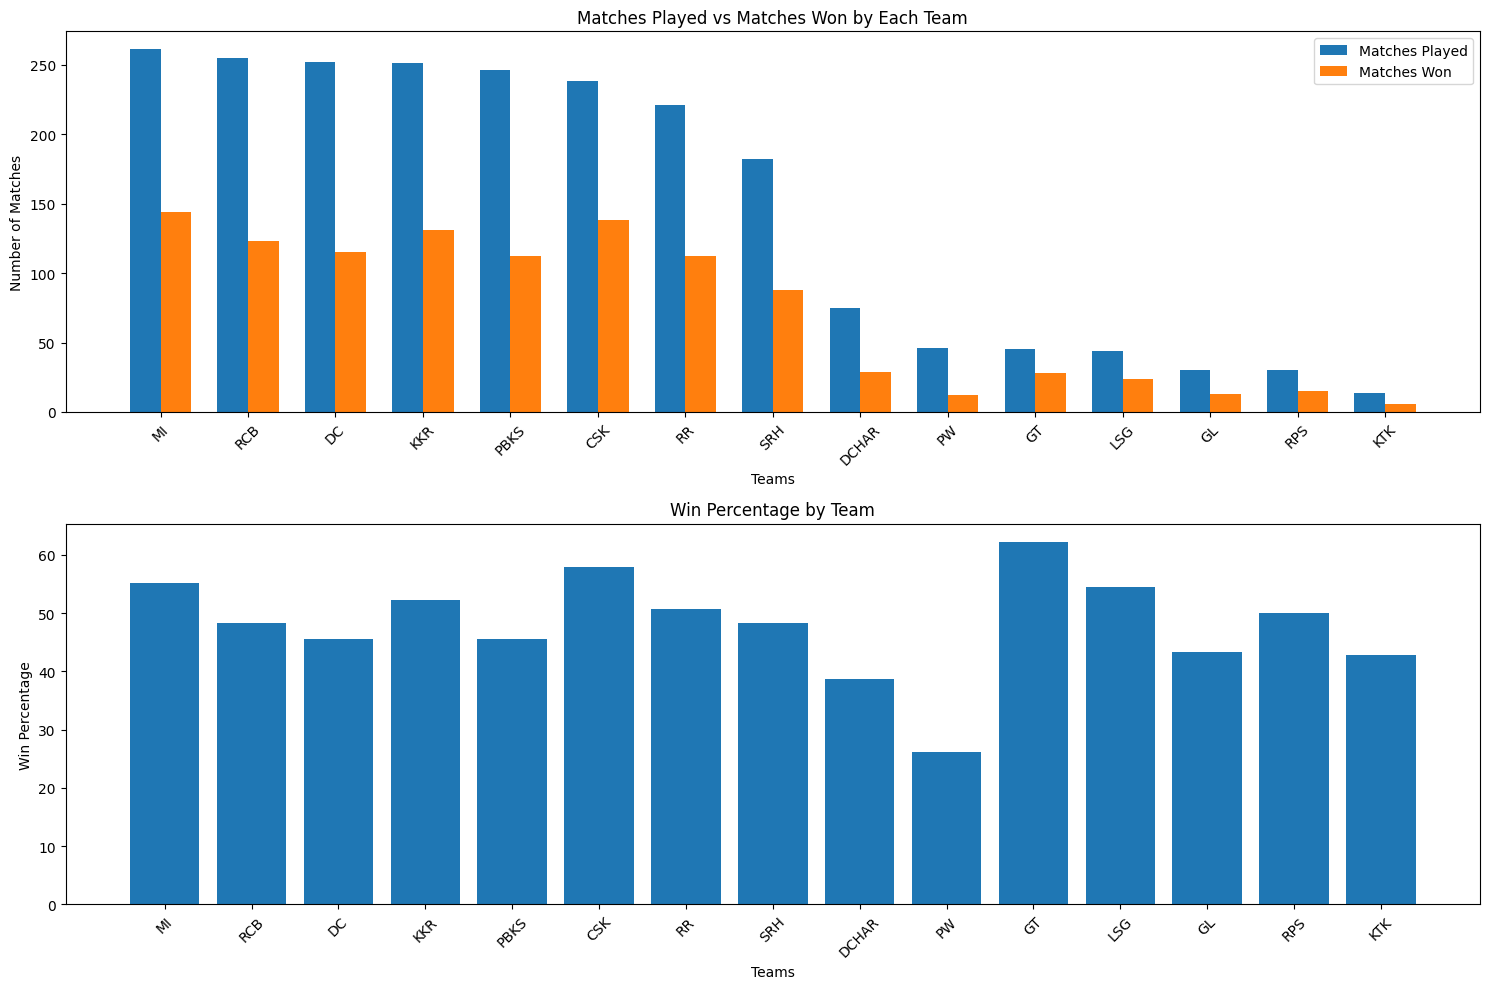


Team Statistics:
       Matches_Played  Matches_Won  Win_Percentage
MI                261          144           55.17
RCB               255          123           48.24
DC                252          115           45.63
KKR               251          131           52.19
PBKS              246          112           45.53
CSK               238          138           57.98
RR                221          112           50.68
SRH               182           88           48.35
DCHAR              75           29           38.67
PW                 46           12           26.09
GT                 45           28           62.22
LSG                44           24           54.55
GL                 30           13           43.33
RPS                30           15           50.00
KTK                14            6           42.86

Most successful team each season:
season
2007/08      RR
2009         DC
2009/10      MI
2011        CSK
2012        KKR
2013         MI
2014       PBKS
2015        

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv('matches.csv')

team_mappings = {
'RCB': ['Royal Challengers Bangalore', 'Royal Challengers Bengaluru'],
'PBKS': ['Kings XI Punjab', 'Punjab Kings'],
'MI': ['Mumbai Indians'],
'CSK': ['Chennai Super Kings'],
'KKR': ['Kolkata Knight Riders'],
'RR': ['Rajasthan Royals'],
'DC': ['Delhi Daredevils', 'Delhi Capitals'],
'DCHAR': ['Deccan Chargers'],
'SRH': ['Sunrisers Hyderabad'],
'GT': ['Gujarat Titans'],
'LSG': ['Lucknow Super Giants'],
'GL': ['Gujarat Lions'],
'PW': ['Pune Warriors'],
'RPS': ['Rising Pune Supergiant', 'Rising Pune Supergiants'],
'KTK': ['Kochi Tuskers Kerala']
}
# Function to get standardized team name
def get_standard_team_name(team_name):
    for standard_name, variations in team_mappings.items():
        if team_name in variations:
            return standard_name
    return team_name

# Standardize team names in relevant columns
df['team1'] = df['team1'].apply(get_standard_team_name)
df['team2'] = df['team2'].apply(get_standard_team_name)
df['winner'] = df['winner'].apply(get_standard_team_name)

# Calculate total matches played by each team
team_matches = pd.concat([df['team1'], df['team2']]).value_counts()

# Calculate wins for each team
team_wins = df['winner'].value_counts()

# Calculate win percentages
win_percentages = (team_wins / team_matches * 100).round(2)

# Create a DataFrame with all statistics
team_stats = pd.DataFrame({
    'Matches_Played': team_matches,
    'Matches_Won': team_wins,
    'Win_Percentage': win_percentages
})

# Sort by matches played
team_stats = team_stats.sort_values('Matches_Played', ascending=False)

# Plotting
plt.figure(figsize=(15, 10))

# Plot 1: Matches Played vs Matches Won
plt.subplot(2, 1, 1)
bar_width = 0.35
index = range(len(team_stats.index))
plt.bar(index, team_stats['Matches_Played'], bar_width, label='Matches Played')
plt.bar([i + bar_width for i in index], team_stats['Matches_Won'], bar_width, label='Matches Won')
plt.xlabel('Teams')
plt.ylabel('Number of Matches')
plt.title('Matches Played vs Matches Won by Each Team')
plt.xticks([i + bar_width/2 for i in index], team_stats.index, rotation=45)
plt.legend()

# Plot 2: Win Percentages
plt.subplot(2, 1, 2)
plt.bar(team_stats.index, team_stats['Win_Percentage'])
plt.xlabel('Teams')
plt.ylabel('Win Percentage')
plt.title('Win Percentage by Team')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print statistical summary
print("\nTeam Statistics:")
print(team_stats)

# Additional Analysis: Season-wise performance
print("\nMost successful team each season:")
season_winners = df.groupby('season')['winner'].agg(lambda x: x.value_counts().index[0])
print(season_winners)

# Calculate average win margin when batting first vs chasing
batting_first = df[df['toss_decision'] == 'bat']['result_margin'].mean()
chasing = df[df['toss_decision'] == 'field']['result_margin'].mean()

print("\nAverage win margin:")
print(f"When batting first: {batting_first:.2f}")
print(f"When chasing: {chasing:.2f}")

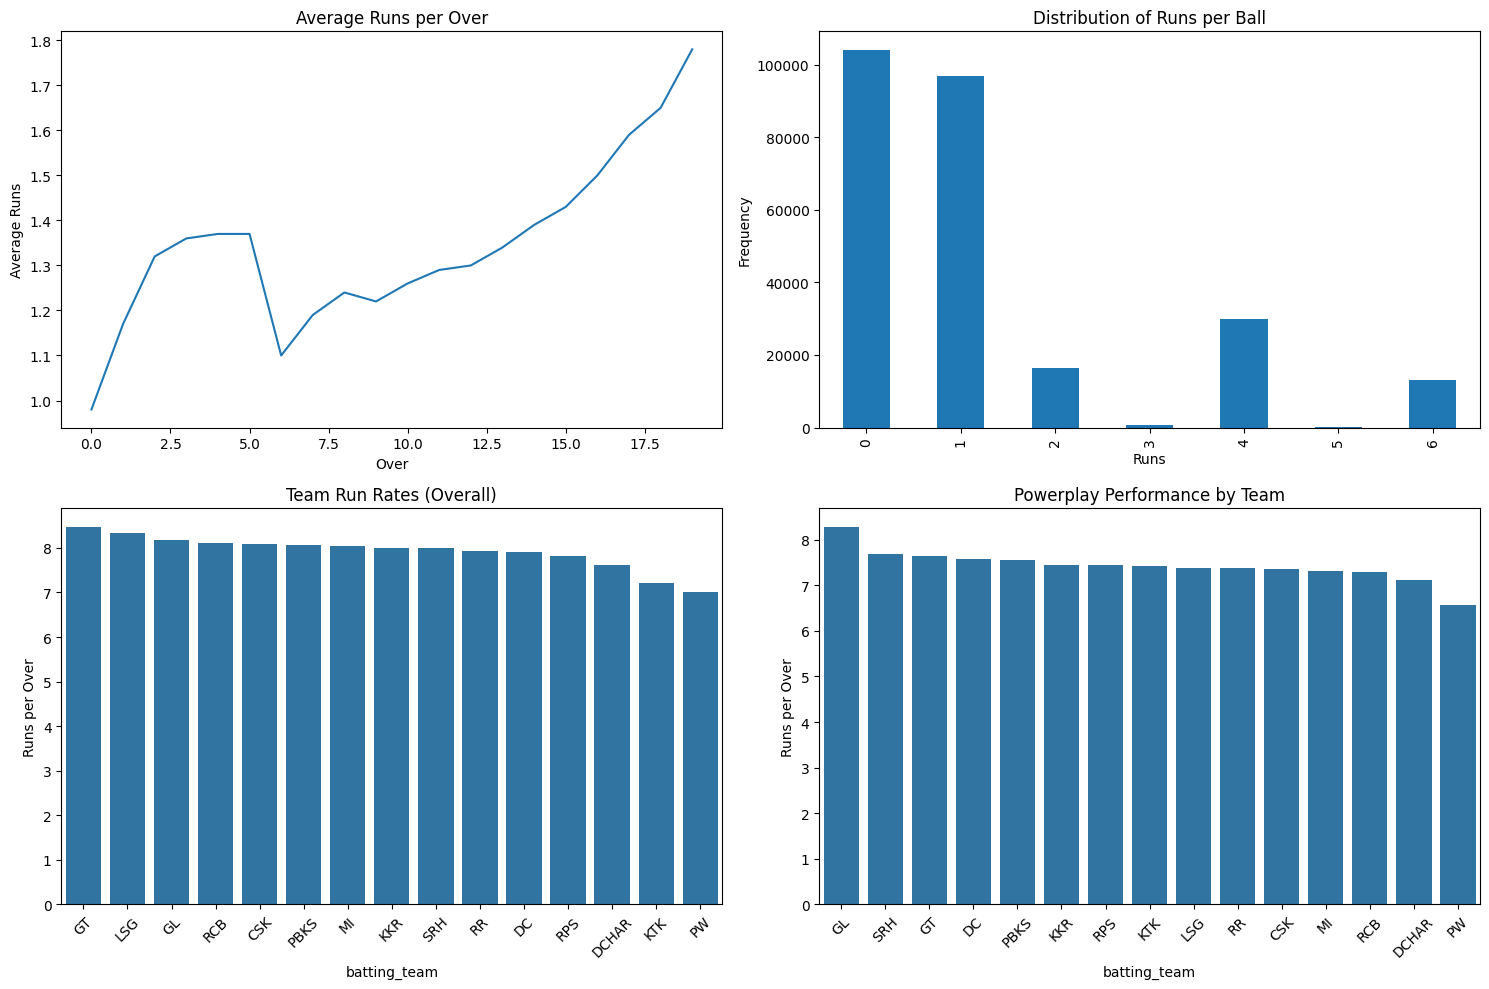


ANALYSIS RESULTS FOR ALL VISUALIZATIONS

1. Over-wise Scoring Pattern Statistics:
--------------------------------------------------
      Avg Runs  Total Runs
over                      
0         0.98       13651
1         1.17       16163
2         1.32       17895
3         1.36       18415
4         1.37       18565
5         1.37       18528
6         1.10       14839
7         1.19       15981
8         1.24       16639
9         1.22       16353
10        1.26       16779
11        1.29       17076
12        1.30       17205
13        1.34       17634
14        1.39       18149
15        1.43       18472
16        1.50       19012
17        1.59       19559
18        1.65       19076
19        1.78       17765

2. Run Distribution Statistics:
--------------------------------------------------
   Runs   Count
0     0  103940
1     1   96778
2     2   16453
3     3     783
4     4   29850
5     5      65
6     6   13051

3. Team Run Rate Statistics:
------------------------------

In [ ]:
#Addition statistics based on deliveries dataset
# Read the dataset
deliveries = pd.read_csv('deliveries.csv')
correct: the Gujarat Titans have played 16 matches at their home ground, the Narendra Modi Stadium, up to and


def get_standard_team_name(team_name):
    for standard_name, variations in team_mappings.items():
        if team_name in variations:
            return standard_name
    return team_name

deliveries['batting_team'] = deliveries['batting_team'].apply(get_standard_team_name)
deliveries['bowling_team'] = deliveries['bowling_team'].apply(get_standard_team_name)

# 1. Scoring Patterns Analysis
def analyze_scoring_patterns():
    over_stats = deliveries.groupby('over')['total_runs'].agg(['mean', 'sum']).round(2)
    runs_dist = deliveries['batsman_runs'].value_counts().sort_index()
    boundaries = deliveries[deliveries['batsman_runs'].isin([4, 6])]
    return over_stats, runs_dist, boundaries

# 2. Team Run Rate Analysis
def analyze_team_run_rates():
    team_stats = deliveries.groupby('batting_team').agg({
        'total_runs': ['count', 'sum'],
        'is_wicket': 'sum'
    }).round(2)
    team_stats.columns = ['Balls_Faced', 'Runs_Scored', 'Wickets_Lost']
    team_stats['Run_Rate'] = (team_stats['Runs_Scored'] / team_stats['Balls_Faced'] * 6).round(2)
    return team_stats.sort_values('Run_Rate', ascending=False)

# 3. Powerplay Analysis
def analyze_powerplay():
    powerplay = deliveries[deliveries['over'] <= 6]
    batting_stats = powerplay.groupby('batting_team').agg({
        'total_runs': ['count', 'sum'],
        'is_wicket': 'sum'
    }).round(2)
    batting_stats.columns = ['Balls', 'Runs', 'Wickets']
    batting_stats['Run_Rate'] = (batting_stats['Runs'] / batting_stats['Balls'] * 6).round(2)
    return batting_stats.sort_values('Run_Rate', ascending=False)

# Calculate statistics
over_stats, runs_dist, boundaries = analyze_scoring_patterns()
team_run_rates = analyze_team_run_rates()
powerplay_stats = analyze_powerplay()

# Visualizations
plt.figure(figsize=(15, 10))

# 1. Over-wise Scoring Pattern
plt.subplot(2, 2, 1)
plt.plot(over_stats.index, over_stats['mean'])
plt.title('Average Runs per Over')
plt.xlabel('Over')
plt.ylabel('Average Runs')

# 2. Run Distribution
plt.subplot(2, 2, 2)
runs_dist.plot(kind='bar')
plt.title('Distribution of Runs per Ball')
plt.xlabel('Runs')
plt.ylabel('Frequency')

# 3. Team Run Rates
plt.subplot(2, 2, 3)
sns.barplot(x=team_run_rates.index, y=team_run_rates['Run_Rate'])
plt.title('Team Run Rates (Overall)')
plt.xticks(rotation=45)
plt.ylabel('Runs per Over')

# 4. Powerplay Performance
plt.subplot(2, 2, 4)
sns.barplot(x=powerplay_stats.index, y=powerplay_stats['Run_Rate'])
plt.title('Powerplay Performance by Team')
plt.xticks(rotation=45)
plt.ylabel('Runs per Over')

plt.tight_layout()
plt.show()

# Print Statistics for All Visualizations
print("\nANALYSIS RESULTS FOR ALL VISUALIZATIONS")
print("="*60)

# 1. Over-wise Scoring Statistics
print("\n1. Over-wise Scoring Pattern Statistics:")
print("-"*50)
print(over_stats.rename(columns={'mean': 'Avg Runs', 'sum': 'Total Runs'}))

# 2. Run Distribution Statistics
print("\n2. Run Distribution Statistics:")
print("-"*50)
print(pd.DataFrame({
    'Runs': runs_dist.index,
    'Count': runs_dist.values
}).reset_index(drop=True))

# 3. Team Run Rate Statistics
print("\n3. Team Run Rate Statistics:")
print("-"*50)
print(team_run_rates[['Run_Rate', 'Runs_Scored', 'Balls_Faced']]
      .sort_values('Run_Rate', ascending=False)
      .rename(columns={
          'Run_Rate': 'Runs/Over',
          'Runs_Scored': 'Total Runs',
          'Balls_Faced': 'Balls Faced'
      }))

# 4. Powerplay Performance Statistics
print("\n4. Powerplay Performance Statistics:")
print("-"*50)
print(powerplay_stats[['Run_Rate', 'Runs', 'Wickets']]
      .sort_values('Run_Rate', ascending=False)
      .rename(columns={
          'Run_Rate': 'PP Run Rate',
          'Runs': 'PP Runs',
          'Wickets': 'PP Wickets'
      }))

# Additional Key Metrics
print("\n5. Key Match Statistics:")
print("-"*50)
print(f"Total Boundaries (4s + 6s): {len(boundaries)}")
print(f"Boundary Percentage: {(len(boundaries)/len(deliveries)*100):.1f}%")
print(f"Most Productive Over: {over_stats['mean'].idxmax()} (Avg: {over_stats['mean'].max():.2f} runs)")
print(f"Total Matches Analyzed: {deliveries['match_id'].nunique()}")
print(f"Total Runs Scored: {deliveries['total_runs'].sum()}")
print(f"Total Wickets Taken: {deliveries['is_wicket'].sum()}")

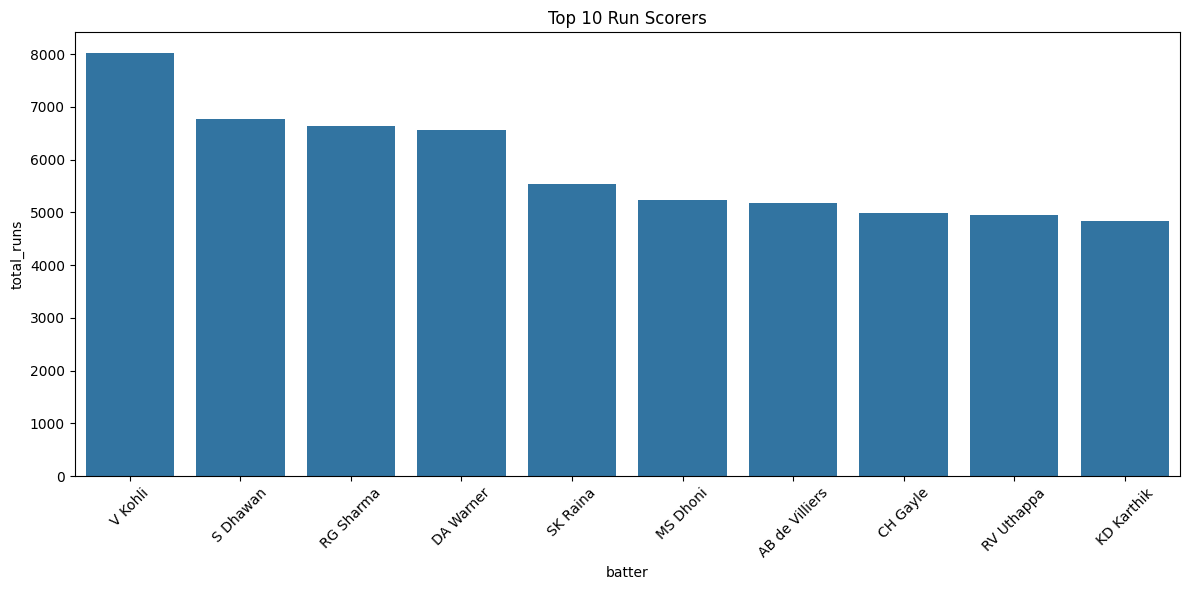

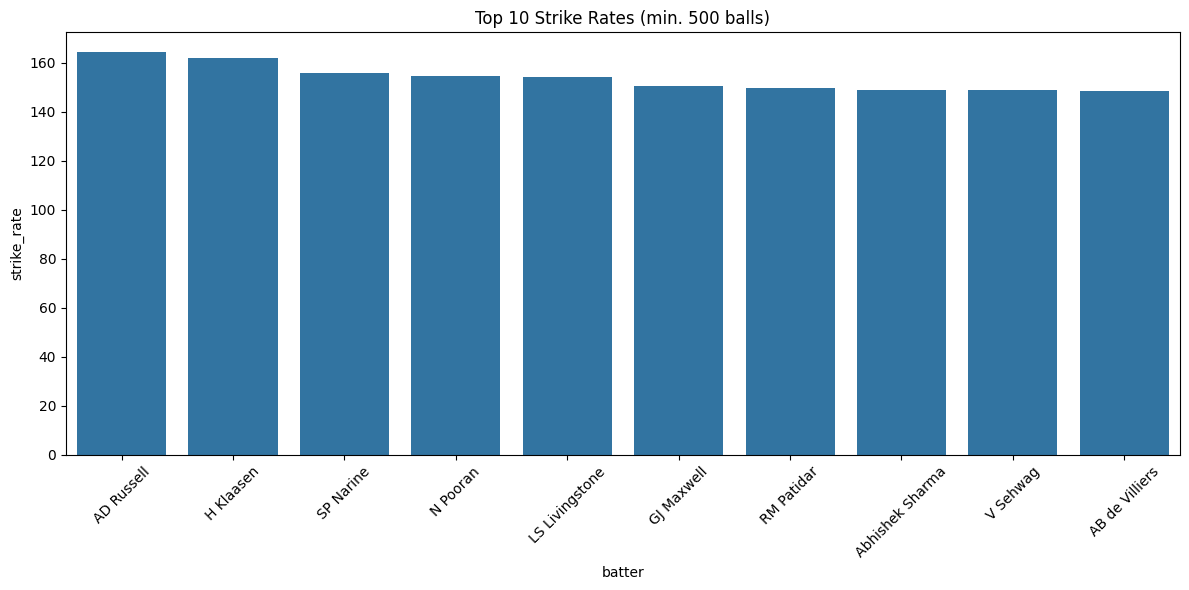

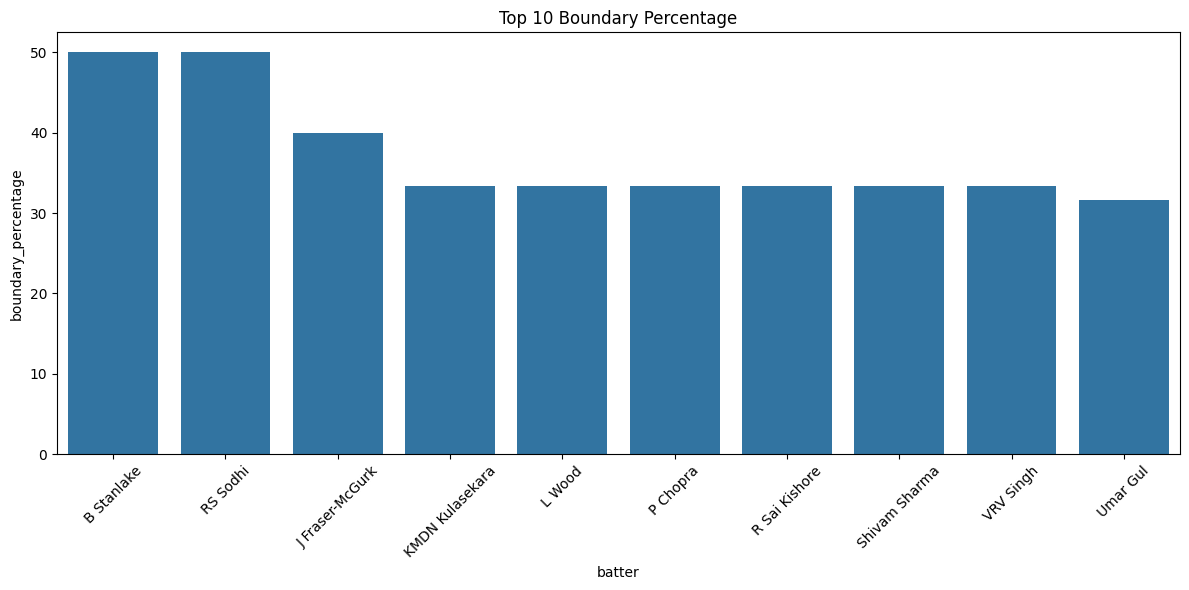

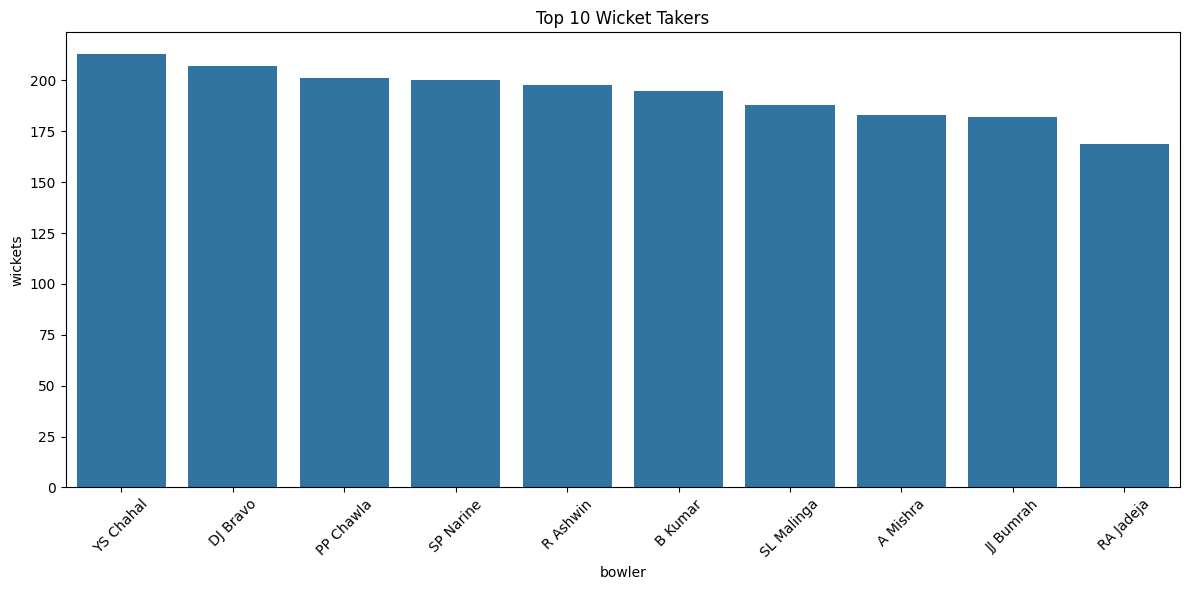

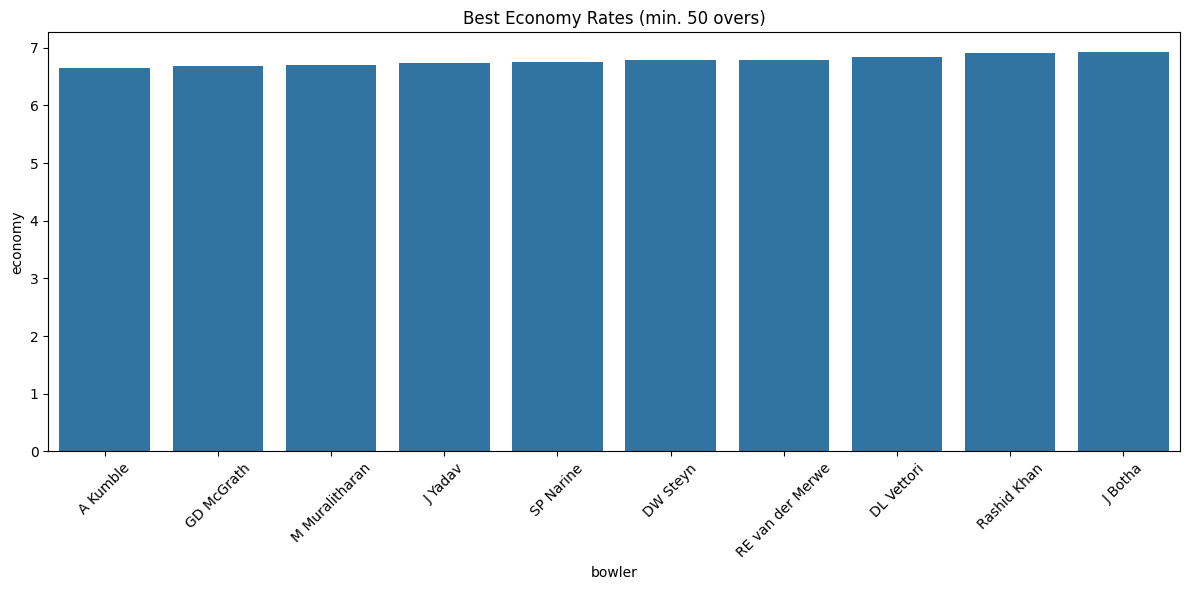


Top 10 Batters by Runs:
        batter  total_runs  strike_rate  fours  sixes
       V Kohli        8014   128.511867  708.0  273.0
      S Dhawan        6769   123.454313  768.0  153.0
     RG Sharma        6630   127.918194  599.0  281.0
     DA Warner        6567   135.429986  663.0  236.0
      SK Raina        5536   132.535312  506.0  204.0
      MS Dhoni        5243   132.835065  363.0  252.0
AB de Villiers        5181   148.580442  414.0  253.0
      CH Gayle        4997   142.121729  408.0  359.0
    RV Uthappa        4954   126.152279  481.0  182.0
    KD Karthik        4843   131.353404  466.0  161.0

Top 10 Batters by Strike Rate (min. 500 balls):
         batter  strike_rate  total_runs  balls_faced
     AD Russell   164.224422        2488         1515
      H Klaasen   161.990212         993          613
      SP Narine   155.894309        1534          984
       N Pooran   154.768154        1769         1143
 LS Livingstone   154.187192         939          609
     GJ 

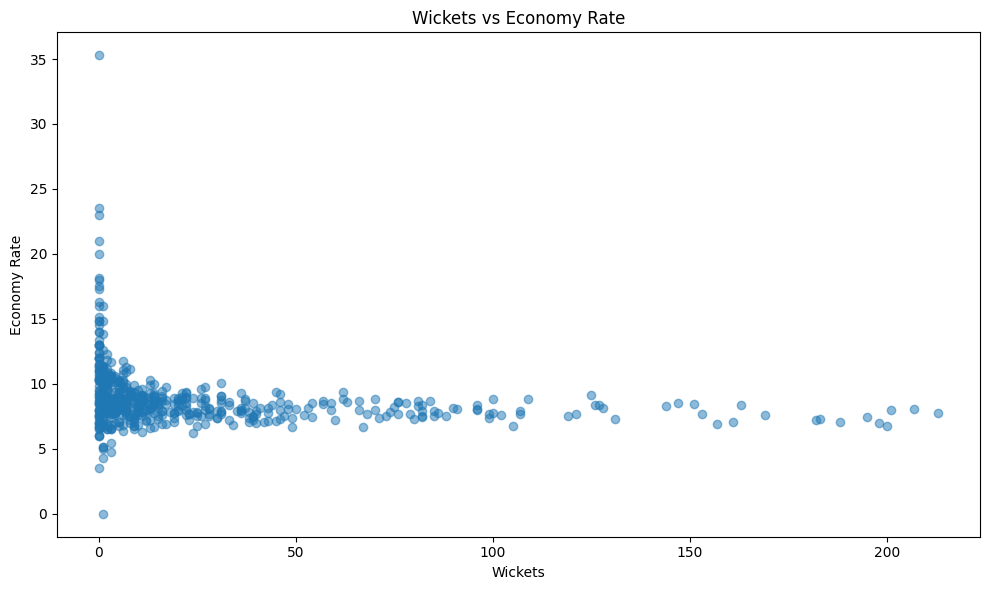

In [ ]:
#Top player analysis
deliveries = pd.read_csv('deliveries.csv')
matches = pd.read_csv('matches.csv')

# Function to standardize team names (using the mapping from previous example)
def get_standard_team_name(team_name):
    for standard_name, variations in team_mappings.items():
        if team_name in variations:
            return standard_name
    return team_name

# Standardize team names in deliveries dataset
deliveries['batting_team'] = deliveries['batting_team'].apply(get_standard_team_name)
deliveries['bowling_team'] = deliveries['bowling_team'].apply(get_standard_team_name)

# BATTING ANALYSIS

# Calculate total runs for each batter
batter_runs = deliveries.groupby('batter')['batsman_runs'].agg(['sum', 'count']).reset_index()
batter_runs.columns = ['batter', 'total_runs', 'balls_faced']

# Calculate strike rate
batter_runs['strike_rate'] = (batter_runs['total_runs'] / batter_runs['balls_faced']) * 100

# Calculate boundaries
boundaries = (
    deliveries[deliveries['batsman_runs'].isin([4, 6])]
    .groupby('batter')
    .agg(
        fours=('batsman_runs', lambda x: (x == 4).sum()),
        sixes=('batsman_runs', lambda x: (x == 6).sum())
    )
    .reset_index()
)

# Merge all batting statistics
batting_stats = pd.merge(batter_runs, boundaries, on='batter', how='left')
batting_stats = batting_stats.fillna(0)
batting_stats['boundary_percentage'] = ((batting_stats['fours'] + batting_stats['sixes']) / batting_stats['balls_faced']) * 100

# BOWLING ANALYSIS

# Calculate bowling statistics
bowling_stats = deliveries.groupby('bowler').agg({
    'is_wicket': 'sum',
    'total_runs': 'sum',
    'ball': 'count'
}).reset_index()

bowling_stats.columns = ['bowler', 'wickets', 'runs_conceded', 'balls_bowled']
bowling_stats['overs'] = (bowling_stats['balls_bowled'] / 6).round(2)
bowling_stats['economy'] = (bowling_stats['runs_conceded'] / bowling_stats['overs']).round(2)
bowling_stats['bowling_average'] = (bowling_stats['runs_conceded'] / bowling_stats['wickets']).round(2)
bowling_stats['bowling_strike_rate'] = (bowling_stats['balls_bowled'] / bowling_stats['wickets']).round(2)

# VISUALIZATIONS

# 1. Top 10 Run Scorers
plt.figure(figsize=(12, 6))
top_scorers = batting_stats.nlargest(10, 'total_runs')
sns.barplot(x='batter', y='total_runs', data=top_scorers)
plt.title('Top 10 Run Scorers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Top 10 Strike Rates (minimum 500 balls faced)
plt.figure(figsize=(12, 6))
qualified_batters = batting_stats[batting_stats['balls_faced'] >= 500]
top_sr = qualified_batters.nlargest(10, 'strike_rate')
sns.barplot(x='batter', y='strike_rate', data=top_sr)
plt.title('Top 10 Strike Rates (min. 500 balls)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Top 10 Boundary Hitters
plt.figure(figsize=(12, 6))
top_boundaries = batting_stats.nlargest(10, 'boundary_percentage')
sns.barplot(x='batter', y='boundary_percentage', data=top_boundaries)
plt.title('Top 10 Boundary Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Top 10 Wicket Takers
plt.figure(figsize=(12, 6))
top_wickets = bowling_stats.nlargest(10, 'wickets')
sns.barplot(x='bowler', y='wickets', data=top_wickets)
plt.title('Top 10 Wicket Takers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Best Economy Rates (minimum 50 overs)
plt.figure(figsize=(12, 6))
qualified_bowlers = bowling_stats[bowling_stats['overs'] >= 50]
best_economy = qualified_bowlers.nsmallest(10, 'economy')
sns.barplot(x='bowler', y='economy', data=best_economy)
plt.title('Best Economy Rates (min. 50 overs)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nTop 10 Batters by Runs:")
print(top_scorers[['batter', 'total_runs', 'strike_rate', 'fours', 'sixes']].to_string(index=False))

print("\nTop 10 Batters by Strike Rate (min. 500 balls):")
print(top_sr[['batter', 'strike_rate', 'total_runs', 'balls_faced']].to_string(index=False))

print("\nTop 10 Bowlers by Wickets:")
print(top_wickets[['bowler', 'wickets', 'economy', 'bowling_average', 'bowling_strike_rate']].to_string(index=False))

# Additional Analysis: Season-wise top performers
def get_season_stats():
    deliveries_with_season = pd.merge(deliveries, matches[['id', 'season']],
                                    left_on='match_id', right_on='id')

    # Season-wise top run scorer
    season_runs = deliveries_with_season.groupby(['season', 'batter'])['batsman_runs'].sum().reset_index()
    top_scorers_by_season = season_runs.sort_values(['season', 'batsman_runs'], ascending=[True, False])\
                           .groupby('season').first()

    # Season-wise top wicket taker
    season_wickets = deliveries_with_season.groupby(['season', 'bowler'])['is_wicket'].sum().reset_index()
    top_wickets_by_season = season_wickets.sort_values(['season', 'is_wicket'], ascending=[True, False])\
                           .groupby('season').first()

    return top_scorers_by_season, top_wickets_by_season

top_scorers_by_season, top_wickets_by_season = get_season_stats()

print("\nSeason-wise Top Run Scorers:")
print(top_scorers_by_season)

print("\nSeason-wise Top Wicket Takers:")
print(top_wickets_by_season)

# Create a scatter plot of wickets vs economy for bowlers
plt.figure(figsize=(10, 6))
plt.scatter(bowling_stats['wickets'], bowling_stats['economy'], alpha=0.5)
plt.xlabel('Wickets')
plt.ylabel('Economy Rate')
plt.title('Wickets vs Economy Rate')
plt.tight_layout()
plt.show()

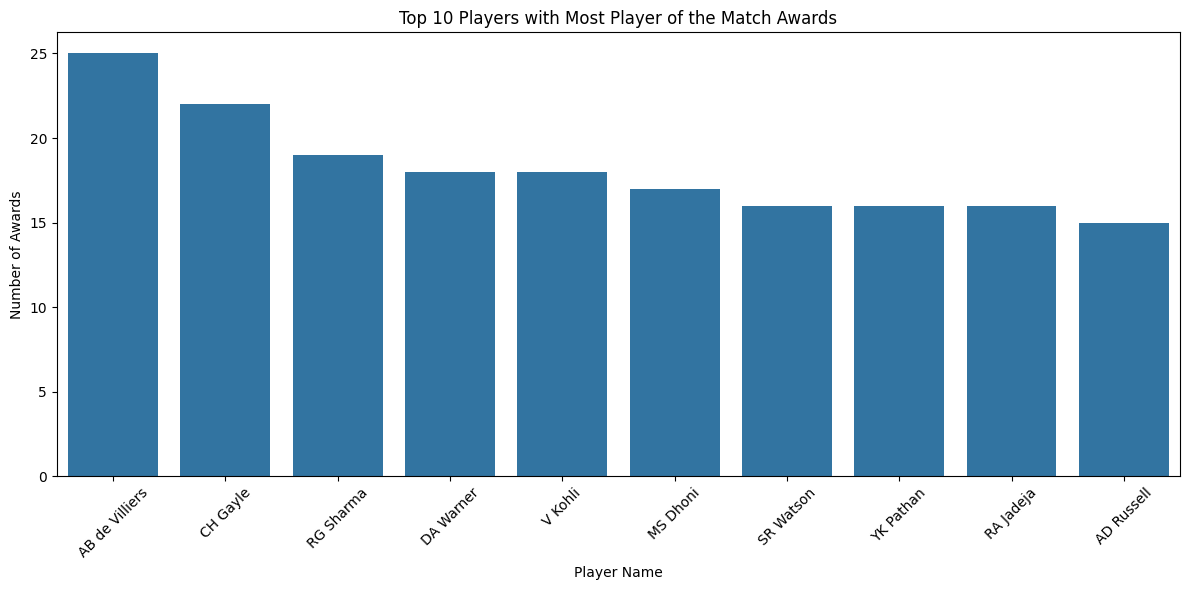


Top 10 Player of Match Winners:

player_of_match
AB de Villiers    25
CH Gayle          22
RG Sharma         19
DA Warner         18
V Kohli           18
MS Dhoni          17
SR Watson         16
YK Pathan         16
RA Jadeja         16
AD Russell        15
Name: count, dtype: int64

Season-wise Top Player of Match Winners:

Season 2007/08: SE Marsh (5 awards)
Season 2009: YK Pathan (3 awards)
Season 2009/10: SR Tendulkar (4 awards)
Season 2011: CH Gayle (6 awards)
Season 2012: CH Gayle (5 awards)
Season 2013: MEK Hussey (5 awards)
Season 2014: GJ Maxwell (4 awards)
Season 2015: DA Warner (4 awards)
Season 2016: V Kohli (5 awards)
Season 2017: BA Stokes (3 awards)
Season 2018: Rashid Khan (4 awards)
Season 2019: AD Russell (4 awards)
Season 2020/21: AB de Villiers (3 awards)
Season 2021: RD Gaikwad (4 awards)
Season 2022: Kuldeep Yadav (4 awards)
Season 2023: Shubman Gill (4 awards)
Season 2024: Abhishek Sharma (3 awards)


In [ ]:
#Player of the match
matches = pd.read_csv('matches.csv')

# Standardize team names in the dataset
def get_standard_team_name(team_name):
    for standard_name, variations in team_mappings.items():
        if team_name in variations:
            return standard_name
    return team_name

matches['team1'] = matches['team1'].apply(get_standard_team_name)
matches['team2'] = matches['team2'].apply(get_standard_team_name)

# Player of Match Analysis
pom_counts = matches['player_of_match'].value_counts()

# 1. Top 10 Players with most Player of the Match awards
plt.figure(figsize=(12, 6))
top_pom = pom_counts.head(10)
sns.barplot(x=top_pom.index, y=top_pom.values)
plt.title('Top 10 Players with Most Player of the Match Awards')
plt.xlabel('Player Name')
plt.ylabel('Number of Awards')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nTop 10 Player of Match Winners:")
print()
print(top_pom)
# 2. Season-wise POM Analysis
season_pom = matches.groupby('season')['player_of_match'].value_counts()
season_top_pom = season_pom.groupby('season').head(1).reset_index()

print("\nSeason-wise Top Player of Match Winners:")
print()
for _, row in season_top_pom.iterrows():
    print(f"Season {row['season']}: {row['player_of_match']} ({row['count']} awards)")



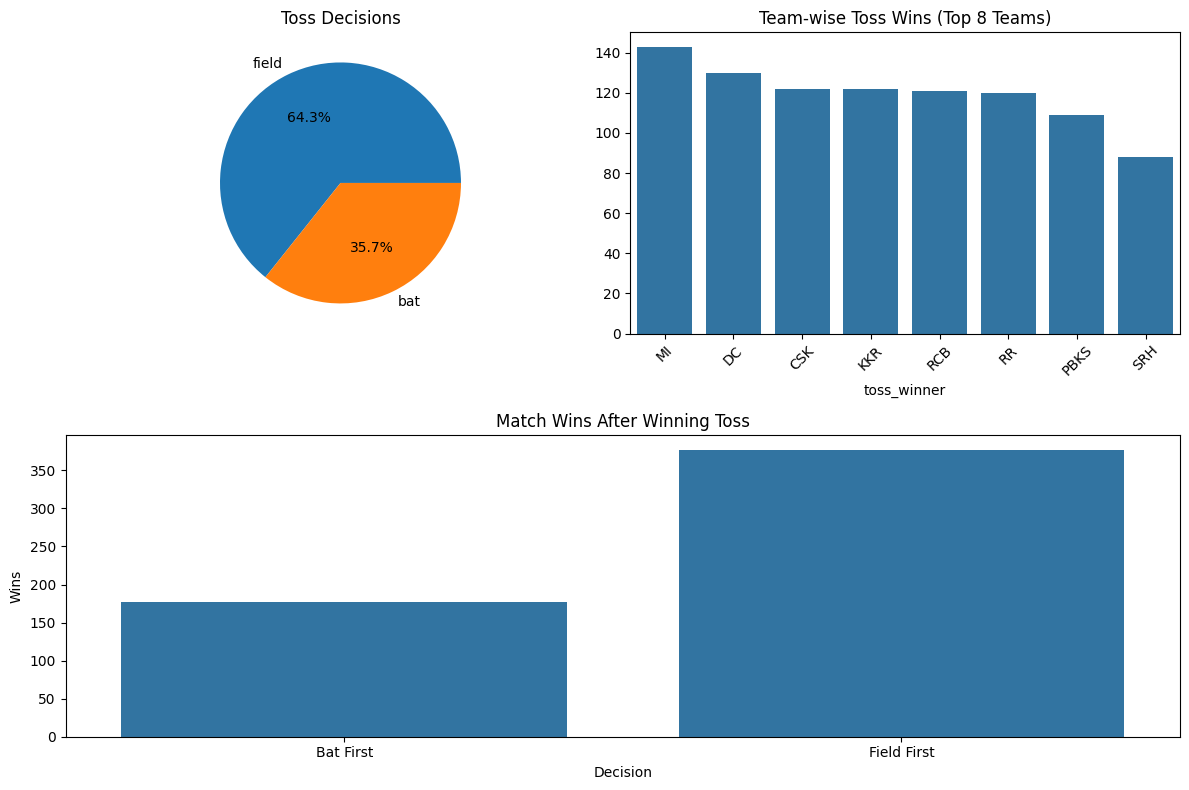


Toss Analysis Summary:
Total Matches: 1095
Matches Won by Toss Winners: 554
Toss Win to Match Win Percentage: 50.59%

Toss Decisions:
Batting First: 391 times
Fielding First: 704 times

Success After Winning Toss:
Won After Choosing to Bat: 177 matches
Won After Choosing to Field: 377 matches


In [ ]:
#Toss analysis
# Read the dataset
matches = pd.read_csv('matches.csv')

# Standardize team names
def get_standard_team_name(team_name):
    for standard_name, variations in team_mappings.items():
        if team_name in variations:
            return standard_name
    return team_name

matches['toss_winner'] = matches['toss_winner'].apply(get_standard_team_name)
matches['winner'] = matches['winner'].apply(get_standard_team_name)pinging broadcast
  -R                 record route


# Basic Toss Statistics
total_matches = len(matches)
toss_and_match_wins = matches[matches['toss_winner'] == matches['winner']].shape[0]
toss_win_percentage = (toss_and_match_wins / total_matches) * 100

# Toss Decision Analysis
toss_decisions = matches['toss_decision'].value_counts()
batting_first_wins = matches[
    (matches['toss_decision'] == 'bat') &
    (matches['toss_winner'] == matches['winner'])
].shape[0]
bowling_first_wins = matches[
    (matches['toss_decision'] == 'field') &
    (matches['toss_winner'] == matches['winner'])
].shape[0]

# Team-wise Toss Wins
team_toss_wins = matches['toss_winner'].value_counts()

# Visualizations
plt.figure(figsize=(12, 8))

# 1. Toss Decisions Pie Chart
plt.subplot(2, 2, 1)
plt.pie(toss_decisions, labels=toss_decisions.index, autopct='%1.1f%%')
plt.title('Toss Decisions')

# 2. Team-wise Toss Wins
plt.subplot(2, 2, 2)
sns.barplot(x=team_toss_wins.head(8).index, y=team_toss_wins.head(8).values)
plt.title('Team-wise Toss Wins (Top 8 Teams)')
plt.xticks(rotation=45)

# 3. Toss Win vs Match Win
plt.subplot(2, 1, 2)
win_data = pd.DataFrame({
    'Decision': ['Bat First', 'Field First'],
    'Wins': [batting_first_wins, bowling_first_wins]
})
sns.barplot(x='Decision', y='Wins', data=win_data)
plt.title('Match Wins After Winning Toss')

plt.tight_layout()
plt.show()

# Print Key Statistics
print("\nToss Analysis Summary:")
print(f"Total Matches: {total_matches}")
print(f"Matches Won by Toss Winners: {toss_and_match_wins}")
print(f"Toss Win to Match Win Percentage: {toss_win_percentage:.2f}%")
print("\nToss Decisions:")
print(f"Batting First: {toss_decisions['bat']} times")
print(f"Fielding First: {toss_decisions['field']} times")
print("\nSuccess After Winning Toss:")
print(f"Won After Choosing to Bat: {batting_first_wins} matches")
print(f"Won After Choosing to Field: {bowling_first_wins} matches")

Stadium Analysis Data for Visualizations:
--------------------------------------------------
                                         Matches  Bat First Win%  \
Eden Gardens                                93.0            40.9   
Wankhede Stadium                           118.0            45.8   
MA Chidambaram Stadium                      85.0            57.6   
Narendra Modi Stadium                       24.0            37.5   
Arun Jaitley Stadium                        90.0            47.8   
M Chinnaswamy Stadium                       79.0            45.6   
Maharashtra Cricket Association Stadium     51.0            54.9   
Sawai Mansingh Stadium                      57.0            35.1   
Rajiv Gandhi International Stadium          77.0            44.2   
Punjab Cricket Association Stadium          61.0            44.3   

                                         Avg 1st Innings  
Eden Gardens                                       164.4  
Wankhede Stadium                        

<ipython-input-16-91da4a3d890e>:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=stadium_stats.index, y=stadium_stats['Batting_First_Win_Percentage'], palette="viridis")
<ipython-input-16-91da4a3d890e>:134: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=stadium_stats.index, y=stadium_stats['Avg_First_Innings_Score'], palette="rocket")


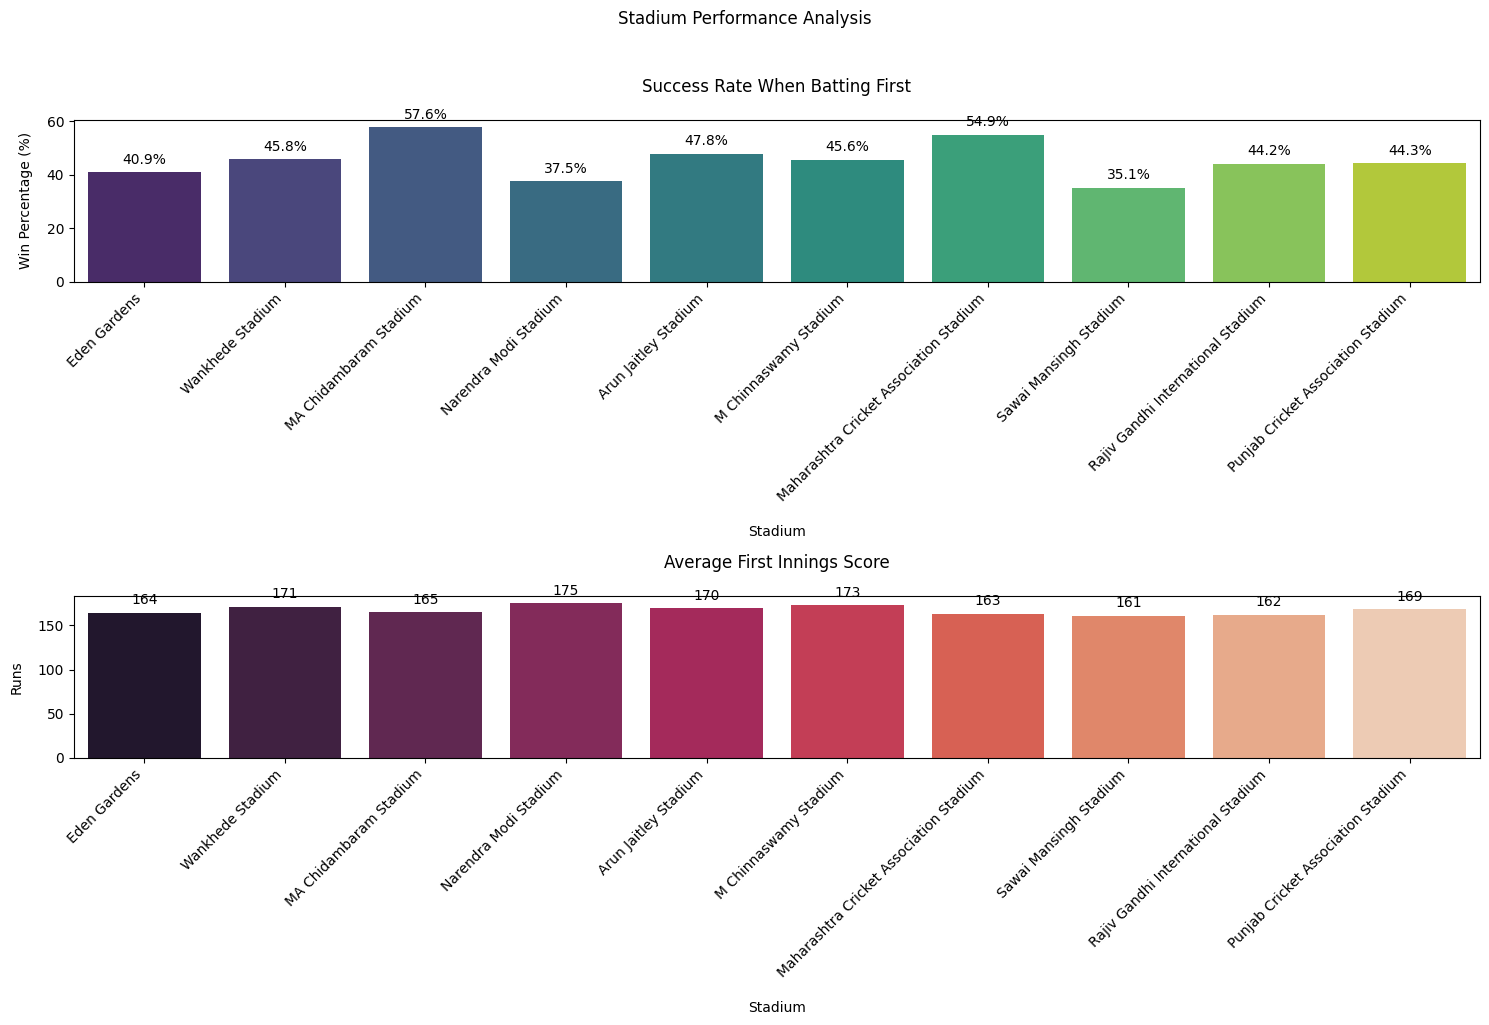

In [ ]:
#Stadium wise toss decision analysis

# Read the dataset
matches = pd.read_csv('matches.csv')

venue_mappings = {
    'Eden Gardens': [
        'Eden Gardens',
        'Eden Gardens, Kolkata'
    ],
    'Wankhede Stadium': [
        'Wankhede Stadium',
        'Wankhede Stadium, Mumbai'
    ],
    'MA Chidambaram Stadium': [
        'MA Chidambaram Stadium, Chepauk',
        'MA Chidambaram Stadium',
        'MA Chidambaram Stadium, Chepauk, Chennai'
    ],
    'Narendra Modi Stadium': [
        'Narendra Modi Stadium, Ahmedabad'
    ],
    'Arun Jaitley Stadium': [
        'Arun Jaitley Stadium',
        'Arun Jaitley Stadium, Delhi',
        'Feroz Shah Kotla',
        'Feroz Shah Kotla Ground'
    ],
    'M Chinnaswamy Stadium': [
        'M Chinnaswamy Stadium',
        'M Chinnaswamy Stadium, Bengaluru'
    ],
    'Maharashtra Cricket Association Stadium': [
        'Maharashtra Cricket Association Stadium',
        'Maharashtra Cricket Association Stadium, Pune',
        'Subrata Roy Sahara Stadium',
        'Sahara Stadium'
    ],
    'Sawai Mansingh Stadium': [
        'Sawai Mansingh Stadium',
        'Sawai Mansingh Stadium, Jaipur'
    ],
    'Rajiv Gandhi International Stadium': [
        'Rajiv Gandhi International Stadium, Uppal',
        'Rajiv Gandhi International Stadium',
        'Rajiv Gandhi International Stadium, Uppal, Hyderabad',
        'Uppal Stadium'
    ],
    'Punjab Cricket Association Stadium': [
        'Punjab Cricket Association Stadium, Mohali',
        'Punjab Cricket Association IS Bindra Stadium, Mohali',
        'Punjab Cricket Association IS Bindra Stadium',
        'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh',
        'IS Bindra Stadium'
    ]
}
# Standardize venue names (assuming venue_mappings is defined)
def get_standard_venue_name(venue):
    for standard_name, variations in venue_mappings.items():
        if venue in variations:
            return standard_name
    return venue

matches['venue'] = matches['venue'].apply(get_standard_venue_name)

# Filter for major stadiums only
major_stadiums = list(venue_mappings.keys())
matches_filtered = matches[matches['venue'].isin(major_stadiums)]

# Stadium-wise Analysis
def analyze_stadium_stats(stadium_data):
    stats = {}
    for stadium in major_stadiums:
        stadium_matches = stadium_data[stadium_data['venue'] == stadium]

        # Total matches
        total_matches = len(stadium_matches)

        # Batting first wins
        batting_first_wins = len(stadium_matches[
            ((stadium_matches['toss_decision'] == 'bat') &
             (stadium_matches['toss_winner'] == stadium_matches['winner'])) |
            ((stadium_matches['toss_decision'] == 'field') &
             (stadium_matches['toss_winner'] != stadium_matches['winner']))
        ])

        # Average first innings score
        first_innings_scores = stadium_matches['target_runs'].mean()

        stats[stadium] = {
            'Total_Matches': total_matches,
            'Batting_First_Wins': batting_first_wins,
            'Batting_First_Win_Percentage': (batting_first_wins/total_matches)*100 if total_matches > 0 else 0,
            'Avg_First_Innings_Score': first_innings_scores
        }

    return pd.DataFrame(stats).T

stadium_stats = analyze_stadium_stats(matches_filtered)

# Visualization Data Preparation
print("Stadium Analysis Data for Visualizations:")
print("-" * 50)
print(stadium_stats[['Total_Matches', 'Batting_First_Win_Percentage', 'Avg_First_Innings_Score']]
      .round(1)
      .rename(columns={
          'Total_Matches': 'Matches',
          'Batting_First_Win_Percentage': 'Bat First Win%',
          'Avg_First_Innings_Score': 'Avg 1st Innings'
      }))

# Visualizations
plt.figure(figsize=(15, 10))
plt.suptitle("Stadium Performance Analysis", y=1.02)

# 1. Batting First Success Rate
plt.subplot(2, 1, 1)
ax1 = sns.barplot(x=stadium_stats.index, y=stadium_stats['Batting_First_Win_Percentage'], palette="viridis")
plt.title('Success Rate When Batting First', pad=20)
plt.xlabel('Stadium', labelpad=15)
plt.ylabel('Win Percentage (%)', labelpad=10)
plt.xticks(rotation=45, ha='right')

# Add value labels
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# 2. Average First Innings Score
plt.subplot(2, 1, 2)
ax2 = sns.barplot(x=stadium_stats.index, y=stadium_stats['Avg_First_Innings_Score'], palette="rocket")
plt.title('Average First Innings Score', pad=20)
plt.xlabel('Stadium', labelpad=15)
plt.ylabel('Runs', labelpad=10)
plt.xticks(rotation=45, ha='right')

# Add value labels
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.tight_layout()
plt.show()

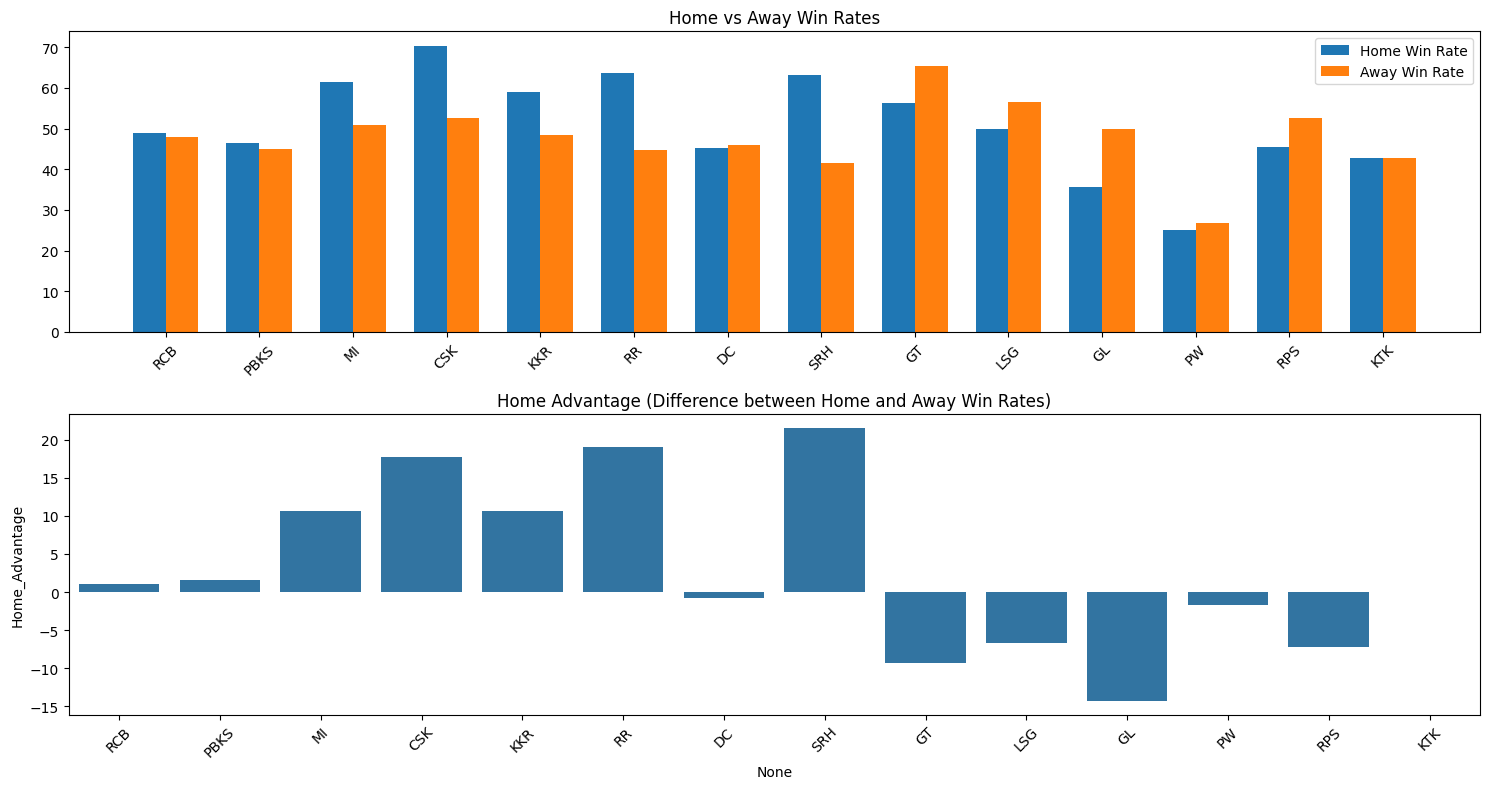


Home Advantage Analysis:
--------------------------------------------------

RCB:
Total Matches: 255
Home Matches: 90 (Wins: 44)
Away Matches: 165 (Wins: 79)
Home Win Rate: 48.9%
Away Win Rate: 47.9%
Home Advantage: 1.0%

PBKS:
Total Matches: 246
Home Matches: 86 (Wins: 40)
Away Matches: 160 (Wins: 72)
Home Win Rate: 46.5%
Away Win Rate: 45.0%
Home Advantage: 1.5%

MI:
Total Matches: 261
Home Matches: 104 (Wins: 64)
Away Matches: 157 (Wins: 80)
Home Win Rate: 61.5%
Away Win Rate: 51.0%
Home Advantage: 10.6%
Strong home advantage!

CSK:
Total Matches: 238
Home Matches: 71 (Wins: 50)
Away Matches: 167 (Wins: 88)
Home Win Rate: 70.4%
Away Win Rate: 52.7%
Home Advantage: 17.7%
Strong home advantage!

KKR:
Total Matches: 251
Home Matches: 88 (Wins: 52)
Away Matches: 163 (Wins: 79)
Home Win Rate: 59.1%
Away Win Rate: 48.5%
Home Advantage: 10.6%
Strong home advantage!

RR:
Total Matches: 221
Home Matches: 69 (Wins: 44)
Away Matches: 152 (Wins: 68)
Home Win Rate: 63.8%
Away Win Rate: 44.7%
Ho

In [ ]:
#Home advantage analysis
# Read the dataset
matches = pd.read_csv('matches.csv')
# Convert season to integer by taking the first part of split (e.g., "2007/08" becomes 2007)
matches['season'] = matches['season'].str.split('/').str[0].astype(int)

home_cities = {
'RCB': ['Bangalore', 'Bengaluru'],
'PBKS': ['Chandigarh', 'Mohali', 'Dharamsala', 'Indore'], # indore not in 2011
'MI': ['Mumbai'],
'CSK': ['Chennai'],
'KKR': ['Kolkata'],
'RR': ['Jaipur', 'Ahmedabad'], # Ahmedabad before 2016
'DC': ['Delhi'],
'SRH': ['Hyderabad'],
'GT': ['Ahmedabad'],
'LSG': ['Lucknow'],
'GL': ['Rajkot', 'Kanpur'],
'PW': ['Pune', 'Dr DY Patil Sports Academy'], # dy patil is a venue not city name because it is in mumbai so to avoid confusion, and that was venue only in 2011 for PW
'RPS': ['Pune'],
'KTK': ['Kochi', 'Indore'] # indore only for 2011
}
# Standardize team names
def get_standard_team_name(team_name):
    for standard_name, variations in team_mappings.items():
        if team_name in variations:
            return standard_name
    return team_name

matches['team1'] = matches['team1'].apply(get_standard_team_name)
matches['team2'] = matches['team2'].apply(get_standard_team_name)
matches['winner'] = matches['winner'].apply(get_standard_team_name)

# Function to determine if a team is playing at home considering special cases
def is_home_match(row, team):
    city = row['city']
    season = row['season']

    if pd.isna(city):
        return False

    # Special cases handling
    if team == 'PBKS' and city == 'Indore' and season == 2011:
        return False

    if team == 'RR' and city == 'Ahmedabad' and season >= 2016:
        return False

    if team == 'KTK' and city == 'Indore' and season != 2011:
        return False

    if team == 'PW' and 'Dr DY Patil Sports Academy' in str(row['venue']) and season != 2011:
        return False

    # Special case for GT in Ahmedabad
    if city == 'Ahmedabad':
        if team == 'GT' and season >= 2022:
            return True
        if team != 'GT' and season >= 2022:
            return False

    # Simple check if the city is in team's home cities
    return city in home_cities.get(team, [])

# Calculate home advantage statistics
def calculate_home_stats():
    stats = {}
    for team in home_cities.keys():
        # Get seasons where team participated
        team_seasons = matches[(matches['team1'] == team) |
                             (matches['team2'] == team)]['season'].unique()

        total_matches = 0
        home_matches = 0
        home_wins = 0
        away_matches = 0
        away_wins = 0

        for season in team_seasons:
            # Get matches for this season
            season_matches = matches[matches['season'] == season]
            team_matches = season_matches[(season_matches['team1'] == team) |
                                        (season_matches['team2'] == team)]

            # Identify home matches
            season_home_matches = team_matches[team_matches.apply(
                lambda x: is_home_match(x, team), axis=1)]

            # Update statistics
            total_matches += len(team_matches)
            home_matches += len(season_home_matches)
            home_wins += len(season_home_matches[season_home_matches['winner'] == team])

            # Away matches
            season_away_matches = team_matches[~team_matches.apply(
                lambda x: is_home_match(x, team), axis=1)]
            away_matches += len(season_away_matches)
            away_wins += len(season_away_matches[season_away_matches['winner'] == team])

        if total_matches > 0:
            home_win_rate = (home_wins / home_matches * 100) if home_matches > 0 else 0
            away_win_rate = (away_wins / away_matches * 100) if away_matches > 0 else 0

            stats[team] = {
                'Total_Matches': total_matches,
                'Home_Matches': home_matches,
                'Home_Wins': home_wins,
                'Away_Matches': away_matches,
                'Away_Wins': away_wins,
                'Home_Win_Rate': home_win_rate,
                'Away_Win_Rate': away_win_rate,
                'Home_Advantage': home_win_rate - away_win_rate
            }

    return pd.DataFrame(stats).T

home_stats = calculate_home_stats()

# Visualizations
plt.figure(figsize=(15, 8))

# 1. Home vs Away Win Rates
plt.subplot(2, 1, 1)
x = range(len(home_stats.index))
width = 0.35
plt.bar(x, home_stats['Home_Win_Rate'], width, label='Home Win Rate')
plt.bar([i + width for i in x], home_stats['Away_Win_Rate'], width, label='Away Win Rate')
plt.xticks([i + width/2 for i in x], home_stats.index, rotation=45)
plt.title('Home vs Away Win Rates')
plt.legend()

# 2. Home Advantage
plt.subplot(2, 1, 2)
sns.barplot(x=home_stats.index, y=home_stats['Home_Advantage'])
plt.title('Home Advantage (Difference between Home and Away Win Rates)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print Analysis
print("\nHome Advantage Analysis:")
print("-" * 50)

for team in home_stats.index:
    stats = home_stats.loc[team]
    print(f"\n{team}:")
    print(f"Total Matches: {stats['Total_Matches']:.0f}")
    print(f"Home Matches: {stats['Home_Matches']:.0f} (Wins: {stats['Home_Wins']:.0f})")
    print(f"Away Matches: {stats['Away_Matches']:.0f} (Wins: {stats['Away_Wins']:.0f})")
    print(f"Home Win Rate: {stats['Home_Win_Rate']:.1f}%")
    print(f"Away Win Rate: {stats['Away_Win_Rate']:.1f}%")
    print(f"Home Advantage: {stats['Home_Advantage']:.1f}%")

    # Additional insights
    if stats['Home_Advantage'] > 10:
        print("Strong home advantage!")
    elif stats['Home_Advantage'] < -10:
        print("Better performance away from home!")

# Overall league analysis
print("\nLeague-wide Statistics:")
print(f"Average Home Win Rate: {home_stats['Home_Win_Rate'].mean():.1f}%")
print(f"Average Away Win Rate: {home_stats['Away_Win_Rate'].mean():.1f}%")
print(f"Average Home Advantage: {home_stats['Home_Advantage'].mean():.1f}%")

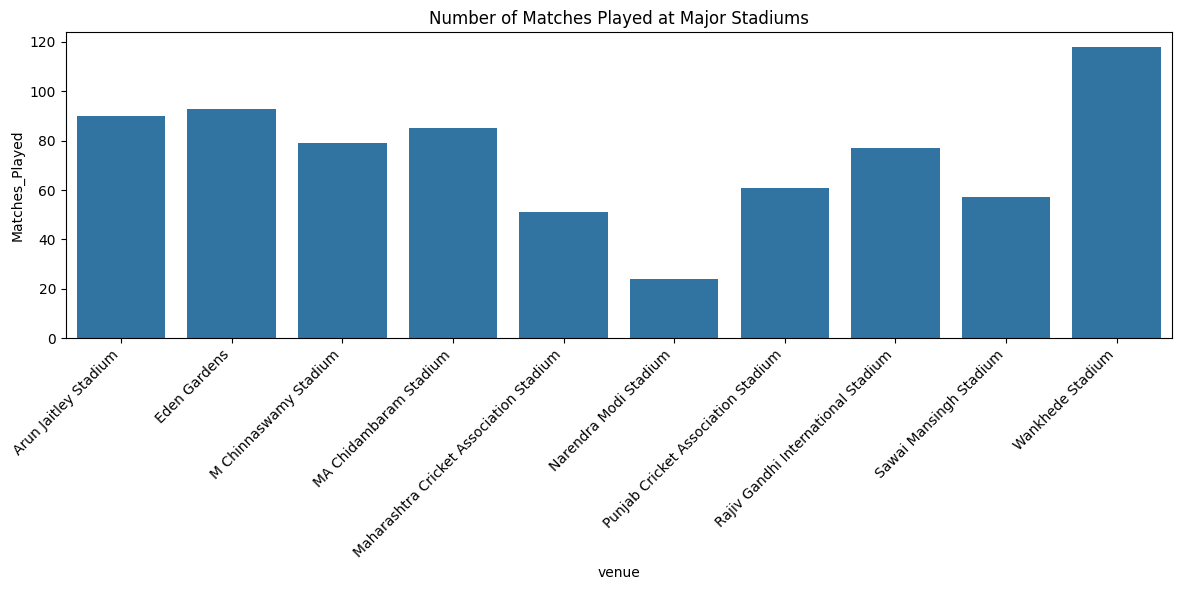

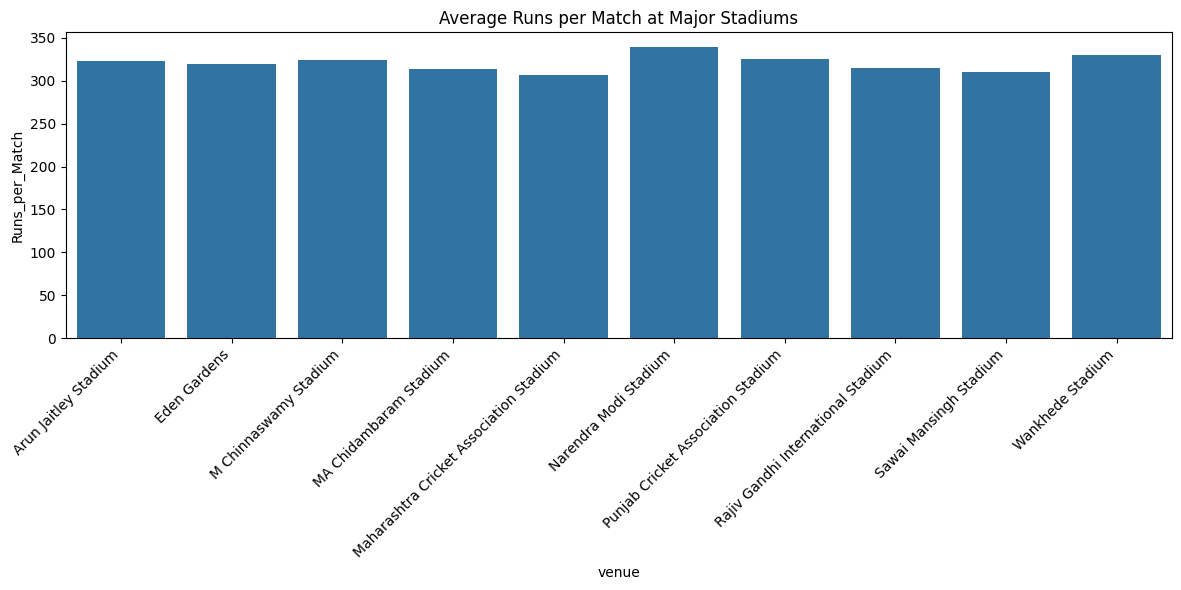

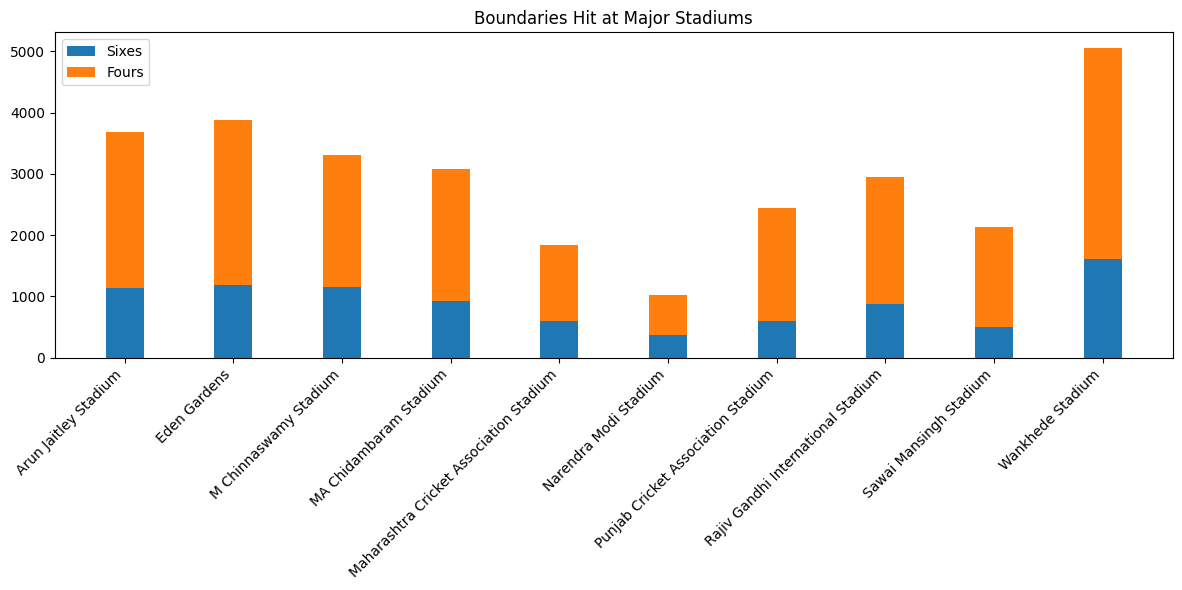

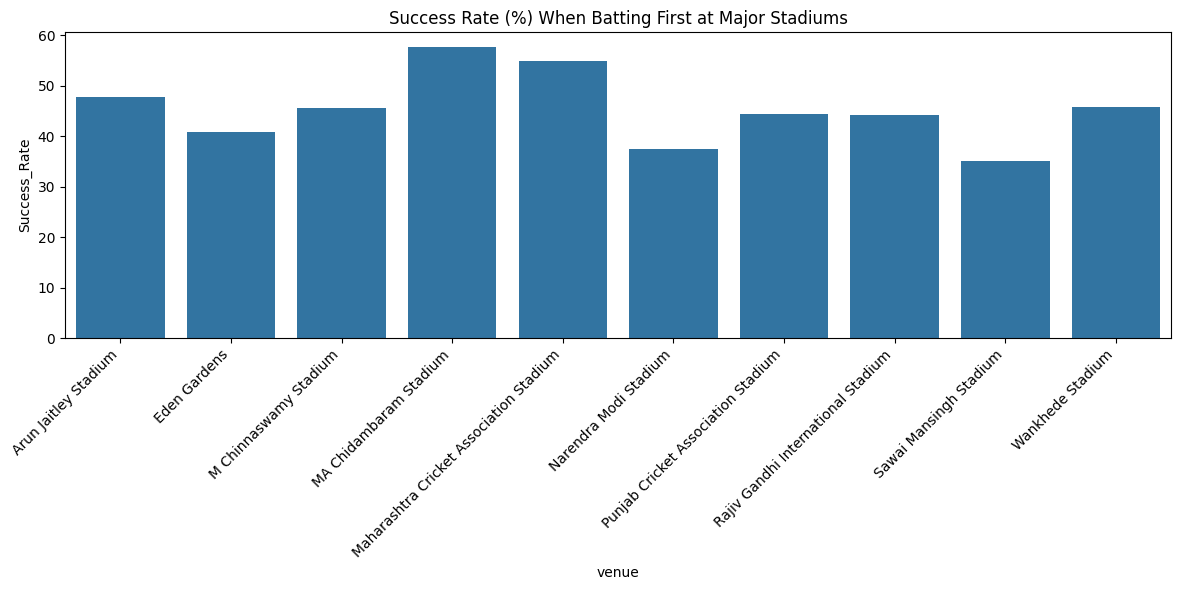

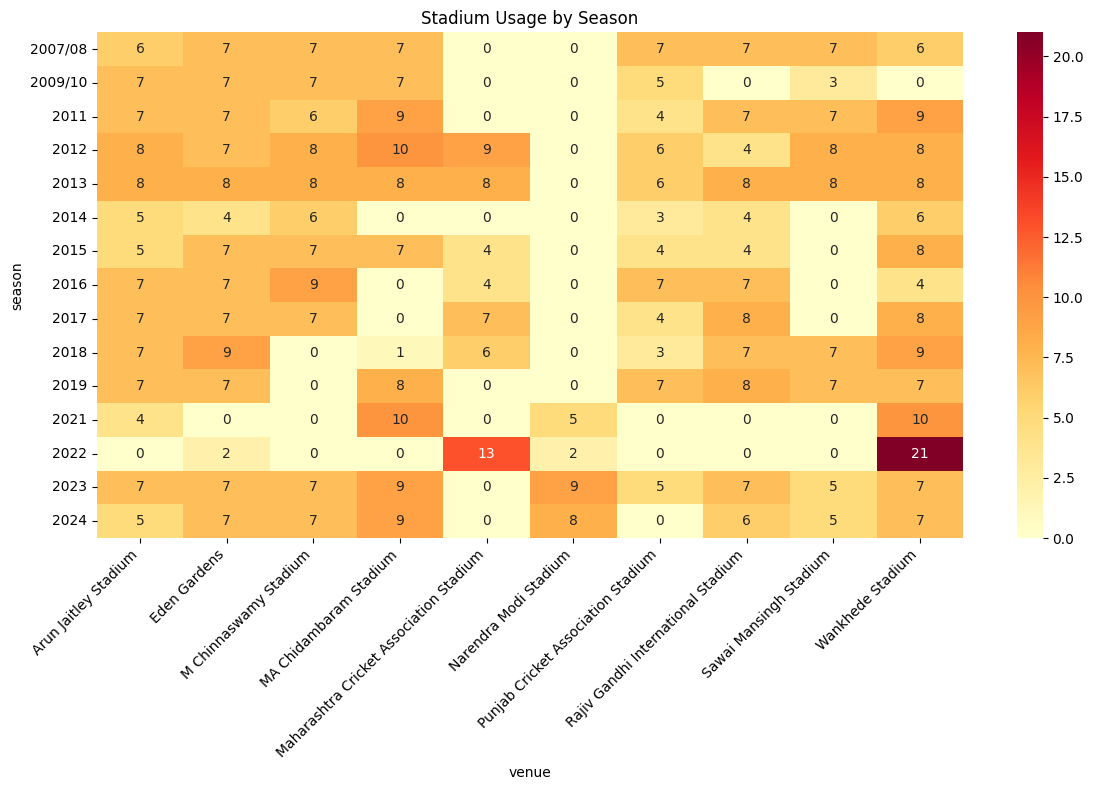


Stadium Statistics Summary:
                                         Matches_Played  Total_Runs  Sixes  \
venue                                                                        
Arun Jaitley Stadium                                 90       29055   1133   
Eden Gardens                                         93       29743   1183   
M Chinnaswamy Stadium                                79       25585   1146   
MA Chidambaram Stadium                               85       26706    924   
Maharashtra Cricket Association Stadium              51       15643    602   
Narendra Modi Stadium                                24        8150    376   
Punjab Cricket Association Stadium                   61       19864    602   
Rajiv Gandhi International Stadium                   77       24262    877   
Sawai Mansingh Stadium                               57       17685    504   
Wankhede Stadium                                    118       38994   1611   

                                  

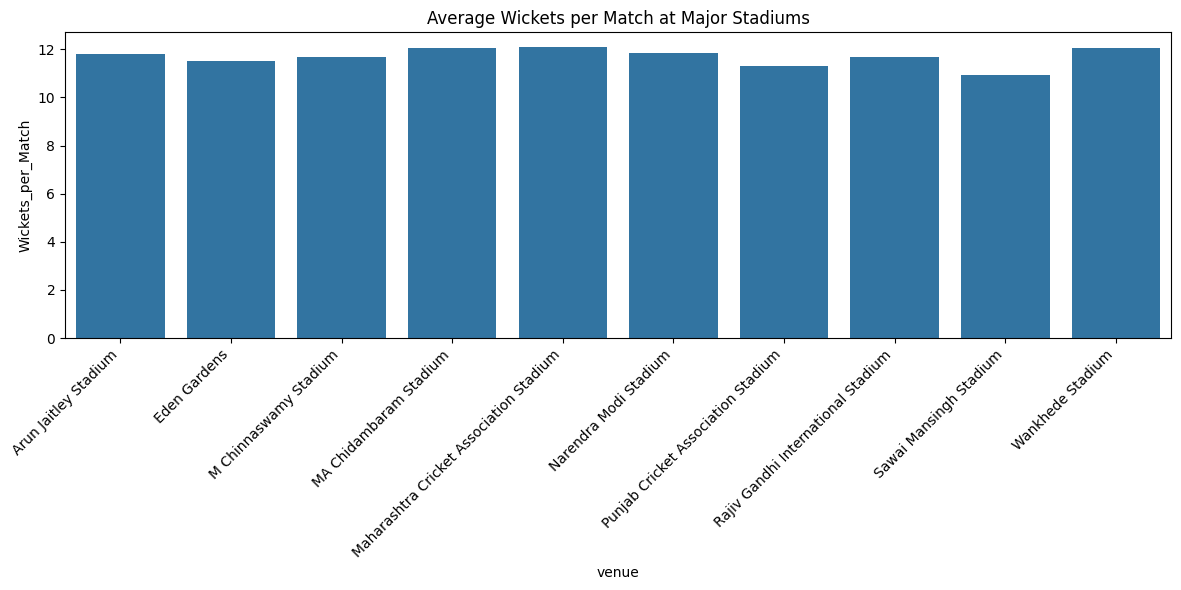

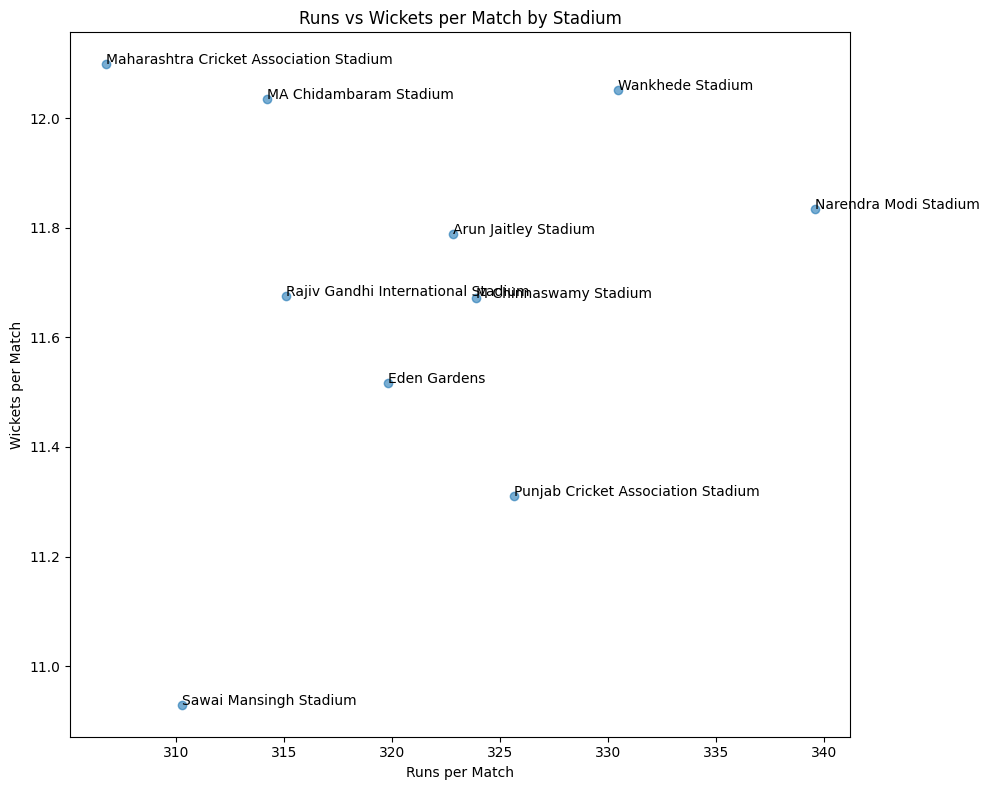


Detailed Stadium Analysis:

Eden Gardens:
Total matches: 93
Average score: 319.82
Boundaries per match: 41.74
Wickets per match: 11.52

Wankhede Stadium:
Total matches: 118
Average score: 330.46
Boundaries per match: 42.88
Wickets per match: 12.05

MA Chidambaram Stadium:
Total matches: 85
Average score: 314.19
Boundaries per match: 36.33
Wickets per match: 12.04

Narendra Modi Stadium:
Total matches: 24
Average score: 339.58
Boundaries per match: 42.67
Wickets per match: 11.83

Arun Jaitley Stadium:
Total matches: 90
Average score: 322.83
Boundaries per match: 41.01
Wickets per match: 11.79

M Chinnaswamy Stadium:
Total matches: 79
Average score: 323.86
Boundaries per match: 41.85
Wickets per match: 11.67

Maharashtra Cricket Association Stadium:
Total matches: 51
Average score: 306.73
Boundaries per match: 36.06
Wickets per match: 12.10

Sawai Mansingh Stadium:
Total matches: 57
Average score: 310.26
Boundaries per match: 37.51
Wickets per match: 10.93

Rajiv Gandhi International St

In [ ]:
#Overall Stadium Analysis
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

# Function to standardize venue names
def get_standard_venue_name(venue):
    for standard_name, variations in venue_mappings.items():
        if venue in variations:
            return standard_name
    return venue

# Standardize venue names
matches['venue'] = matches['venue'].apply(get_standard_venue_name)

# Filter for only the 10 major stadiums
major_stadiums = list(venue_mappings.keys())
matches_filtered = matches[matches['venue'].isin(major_stadiums)]

# Merge matches with deliveries for detailed analysis
match_details = pd.merge(deliveries, matches_filtered[['id', 'venue']],
                        left_on='match_id', right_on='id')

# Calculate stadium-wise statistics
stadium_stats = pd.DataFrame({
    'Matches_Played': matches_filtered['venue'].value_counts(),
    'Total_Runs': match_details.groupby('venue')['total_runs'].sum(),
    'Sixes': match_details[match_details['batsman_runs'] == 6].groupby('venue').size(),
    'Fours': match_details[match_details['batsman_runs'] == 4].groupby('venue').size(),
    'Wickets': match_details.groupby('venue')['is_wicket'].sum()
})

# Calculate additional metrics
stadium_stats['Runs_per_Match'] = stadium_stats['Total_Runs'] / stadium_stats['Matches_Played']
stadium_stats['Wickets_per_Match'] = stadium_stats['Wickets'] / stadium_stats['Matches_Played']
stadium_stats['Boundaries_per_Match'] = (stadium_stats['Sixes'] + stadium_stats['Fours']) / stadium_stats['Matches_Played']

# Visualizations

# 1. Matches played at each stadium
plt.figure(figsize=(12, 6))
sns.barplot(x=stadium_stats.index, y=stadium_stats['Matches_Played'])
plt.title('Number of Matches Played at Major Stadiums')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Average runs per match
plt.figure(figsize=(12, 6))
sns.barplot(x=stadium_stats.index, y=stadium_stats['Runs_per_Match'])
plt.title('Average Runs per Match at Major Stadiums')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Boundaries analysis
plt.figure(figsize=(12, 6))
width = 0.35
plt.bar(stadium_stats.index, stadium_stats['Sixes'], width, label='Sixes')
plt.bar(stadium_stats.index, stadium_stats['Fours'], width, bottom=stadium_stats['Sixes'], label='Fours')
plt.title('Boundaries Hit at Major Stadiums')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# 4. Batting first vs Bowling first success analysis
def analyze_batting_first_success():
    batting_first_wins = matches_filtered[
        ((matches_filtered['toss_decision'] == 'bat') &
         (matches_filtered['toss_winner'] == matches_filtered['winner'])) |
        ((matches_filtered['toss_decision'] == 'field') &
         (matches_filtered['toss_winner'] != matches_filtered['winner']))
    ]

    batting_first_stats = pd.DataFrame({
        'Total_Matches': matches_filtered['venue'].value_counts(),
        'Batting_First_Wins': batting_first_wins['venue'].value_counts()
    }).fillna(0)

    batting_first_stats['Success_Rate'] = (batting_first_stats['Batting_First_Wins'] /
                                         batting_first_stats['Total_Matches'] * 100)
    return batting_first_stats

batting_first_analysis = analyze_batting_first_success()

plt.figure(figsize=(12, 6))
sns.barplot(x=batting_first_analysis.index, y=batting_first_analysis['Success_Rate'])
plt.title('Success Rate (%) When Batting First at Major Stadiums')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. Season-wise stadium usage
plt.figure(figsize=(12, 8))
sns.heatmap(pd.crosstab(matches_filtered['season'], matches_filtered['venue']),
            cmap='YlOrRd', annot=True, fmt='d')
plt.title('Stadium Usage by Season')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nStadium Statistics Summary:")
print(stadium_stats.round(2))

print("\nBatting First Success Rate at Each Stadium:")
print(batting_first_analysis['Success_Rate'].round(2))

# 6. High scoring matches analysis
high_scoring = matches_filtered.groupby('venue').agg({
    'target_runs': ['max', 'mean', 'std']
}).round(2)

print("\nHigh Scoring Matches Analysis:")
print(high_scoring)

# 7. Wickets analysis
plt.figure(figsize=(12, 6))
sns.barplot(x=stadium_stats.index, y=stadium_stats['Wickets_per_Match'])
plt.title('Average Wickets per Match at Major Stadiums')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 8. Scatter plot of runs vs wickets per match
plt.figure(figsize=(10, 8))
plt.scatter(stadium_stats['Runs_per_Match'], stadium_stats['Wickets_per_Match'], alpha=0.6)

for i, txt in enumerate(stadium_stats.index):
    plt.annotate(txt, (stadium_stats['Runs_per_Match'].iloc[i],
                      stadium_stats['Wickets_per_Match'].iloc[i]))

plt.xlabel('Runs per Match')
plt.ylabel('Wickets per Match')
plt.title('Runs vs Wickets per Match by Stadium')
plt.tight_layout()
plt.show()

# Additional summary statistics
print("\nDetailed Stadium Analysis:")
for stadium in major_stadiums:
    stadium_matches = matches_filtered[matches_filtered['venue'] == stadium]
    print(f"\n{stadium}:")
    print(f"Total matches: {len(stadium_matches)}")
    print(f"Average score: {stadium_stats.loc[stadium, 'Runs_per_Match']:.2f}")
    print(f"Boundaries per match: {stadium_stats.loc[stadium, 'Boundaries_per_Match']:.2f}")
    print(f"Wickets per match: {stadium_stats.loc[stadium, 'Wickets_per_Match']:.2f}")